# FEgrow: An Open-Source Molecular Builder and Free Energy Preparation Workflow

**Authors: Mateusz K Bieniek, Ben Cree, Rachael Pirie, Joshua T. Horton, Natalie J. Tatum, Daniel J. Cole**

## Overview

Building and scoring molecules can be further streamlined by employing our established protocol. Here we show how to quickly build a library and score the entire library. 

In [1]:
import pandas as pd
import prody
from rdkit import Chem

import fegrow
from fegrow import ChemSpace

from fegrow.testing import core_5R83_path, smiles_5R83_core_path, rec_5R83_path

# Prepare the ligand template

In [2]:
scaffold = Chem.SDMolSupplier(core_5R83_path)[0]

As we are using already prepared Smiles that have the scaffold as a substructure, it is not needed to set any growing vector. 

In [3]:
# create the chemical space
cs = ChemSpace()

Dask can be watched on http://192.168.178.20:8989/status


In [4]:
# we're not growing the scaffold, we're superimposing bigger molecules on it
cs.add_scaffold(scaffold)
cs.add_protein(rec_5R83_path)

/home/dresio/code/fegrow/fegrow/package.py:792: UserWarning: The template does not have an attachement (Atoms with index 0, or in case of Smiles the * character. )
  warnings.warn("The template does not have an attachement (Atoms with index 0, "


In [5]:
# load 50k Smiles
smiles = pd.read_csv(smiles_5R83_core_path).Smiles.to_list()

# take only 100
smiles = smiles[:20]

# here we add Smiles which should already have been matched
# to the scaffold (rdkit Mol.HasSubstructureMatch)
cs.add_smiles(smiles)

,Smiles,score,h,Training,enamine_searched,enamine_id,2D
0,[H]OC([H])([H])c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
1,[H]ON([H])C(=O)c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
2,[H]OC(=O)N([H])c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
3,[H]ON([H])c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
4,[H]OC(=O)c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
5,[H]OOc1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
6,[H]OC([H])([H])Oc1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
7,[H]OOC([H])([H])c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
8,[H]OS(=O)(=O)c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,
9,[H]ON([H])S(=O)(=O)c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,

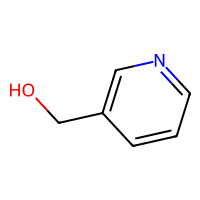
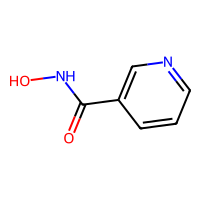
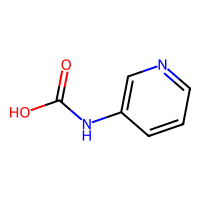
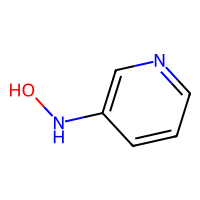
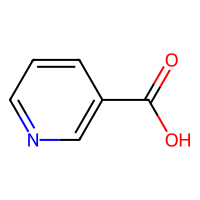
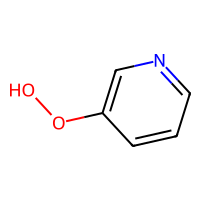
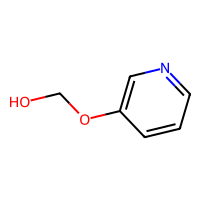
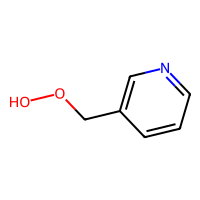
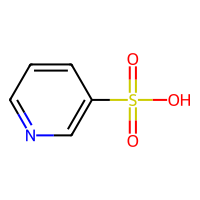
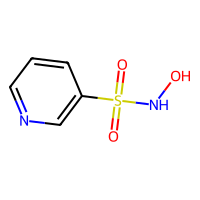
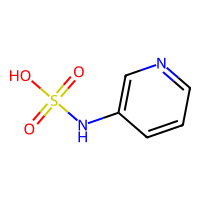
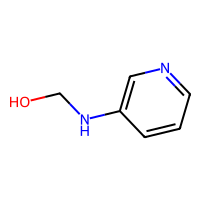
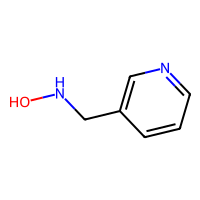
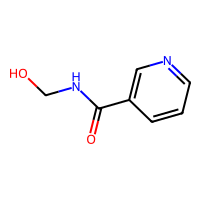
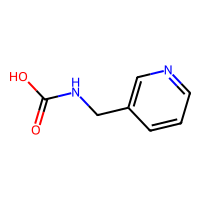
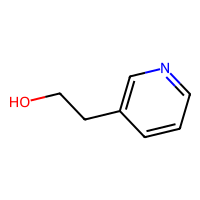
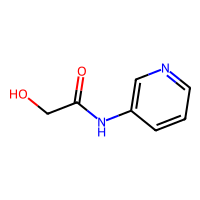
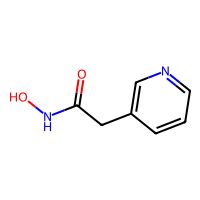
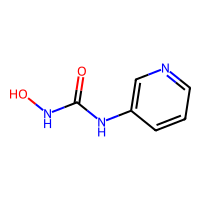
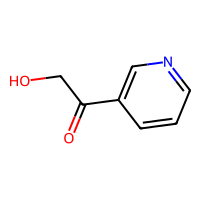

In [6]:
cs

# Active Learning

In [7]:
# There is nothing to train the model on, so initially "first_random" is used by default
random1 = cs.active_learning(2, first_random=True)
random2 = cs.active_learning(2, first_random=True)

# note the different indices selected (unless you're lucky!)
print(random1.index.to_list(), random2.index.to_list())

[3, 7] [7, 4]


/home/dresio/code/fegrow/fegrow/package.py:1228: UserWarning: Selecting 
  warnings.warn("Selecting ")


## Warning! Please change the logger in order to see what is happening inside of ChemSpace.evaluate. There is too much info to output it into the screen .

In [8]:
# now evaluate the first selection
random1_results = cs.evaluate(random1)

Generated 2 conformers. 
Generated 4 conformers. 
Removed 0 conformers. 
Removed 1 conformers. 


/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


using ani2x
using ani2x


/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:55: UserWarning: Dependency not satisfied, torchani.ase will not be available
  warnings.warn("Dependency not satisfied, torchani.ase will not be available")


/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/3 [00:00<?, ?it/s]

failed to equip `nnpops` with error: No module named 'NNPOps'


[W BinaryOps.cpp:594] Warning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (function operator())

Optimising conformer: 100%|███████████████████████| 3/3 [00:03<00:00,  1.07s/it]

Optimising conformer: 100%|███████████████████████| 2/2 [00:03<00:00,  1.68s/it]


In [9]:
# check the scores, note that they were updated in the master dataframe too
random1_results

,Smiles,Mol,score,h,Training,enamine_searched,enamine_id
3,[H]ON([H])c1c([H])nc([H])c([H])c1[H],<rdkit.Chem.rdchem.Mol object at 0x7abd95d10580>,3.176,<NA>,True,False,<NA>
7,[H]OOC([H])([H])c1c([H])nc([H])c([H])c1[H],<rdkit.Chem.rdchem.Mol object at 0x7abd95d10740>,3.337,<NA>,True,False,<NA>


In [10]:
# by default Gaussian Process with Greedy approach is used
# note that this time 
greedy1 = cs.active_learning(2)
greedy2 = cs.active_learning(2)
print(greedy1.index.to_list(), greedy2.index.to_list())

[13, 19] [13, 19]


In [11]:
# learn in cycles
for cycle in range(2):
    greedy = cs.active_learning(2)
    greedy_results = cs.evaluate(greedy)

Generated 4 conformers. 
Generated 6 conformers. 
Removed 1 conformers. 


/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


Removed 0 conformers. 
using ani2x
using ani2x
/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 6/6 [00:08<00:00,  1.44s/it]


Generated 3 conformers. 
Generated 7 conformers. 
Removed 5 conformers. 
Removed 0 conformers. 


/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


using ani2x
/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
using ani2x
/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/3 [00:00<?, ?it/s]

failed to equip `nnpops` with error: No module named 'NNPOps'



Optimising conformer: 100%|███████████████████████| 3/3 [00:05<00:00,  1.69s/it]

Optimising conformer: 100%|███████████████████████| 2/2 [00:05<00:00,  2.70s/it]


In [14]:
computed = cs.df[~cs.df.score.isna()]
print('Computed cases in total: ', len(computed))

Computed cases in total:  6


,Smiles,score,h,Training,enamine_searched,enamine_id,regression,2D
0,[H]OC([H])([H])c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,2.740,
1,[H]ON([H])C(=O)c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,2.769,
2,[H]OC(=O)N([H])c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,2.382,
3,[H]ON([H])c1c([H])nc([H])c([H])c1[H],3.176,<NA>,True,False,<NA>,3.176,
4,[H]OC(=O)c1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,2.704,
5,[H]OOc1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,2.304,
6,[H]OC([H])([H])Oc1c([H])nc([H])c([H])c1[H],<NA>,<NA>,False,False,<NA>,2.189,
7,[H]OOC([H])([H])c1c([H])nc([H])c([H])c1[H],3.337,<NA>,True,False,<NA>,3.337,
8,[H]OS(=O)(=O)c1c([H])nc([H])c([H])c1[H],3.517,<NA>,True,False,<NA>,2.135,
9,[H]ON([H])S(=O)(=O)c1c([H])nc([H])c([H])c1[H],3.569,<NA>,True,False,<NA>,2.055,

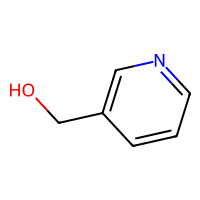
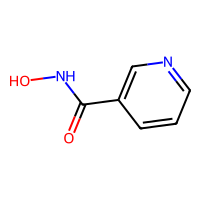
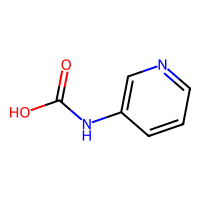
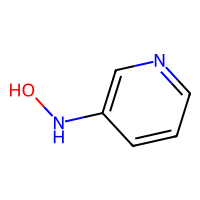
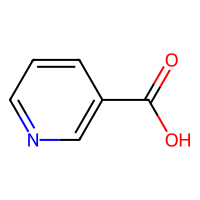
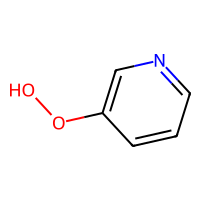
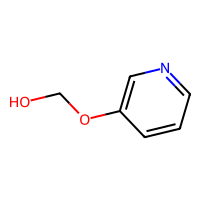
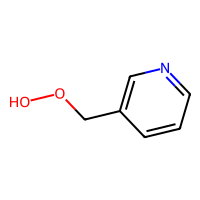
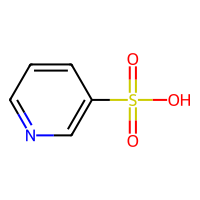
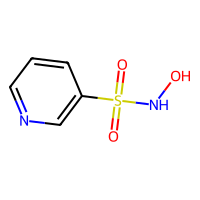
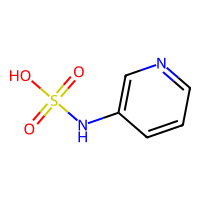
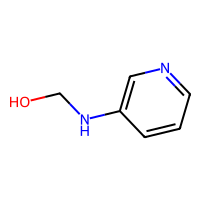
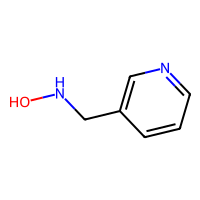
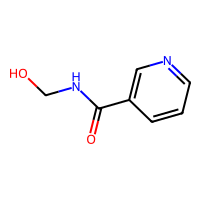
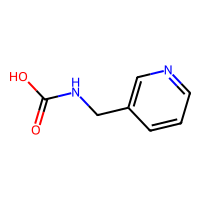
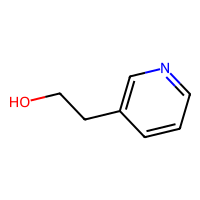
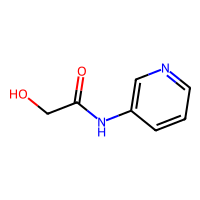
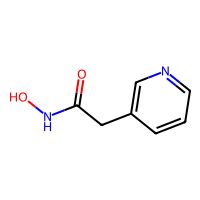
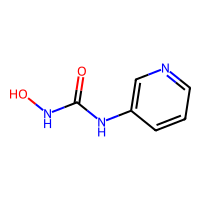
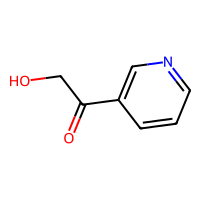

In [12]:
cs